In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ReLU,PReLU
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import joblib


In [92]:
data=pd.read_csv("../Data/diabetes (1).csv")

In [93]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### EDA

In [94]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [95]:
data.shape

(768, 9)

In [96]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [97]:
outliers=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       ]

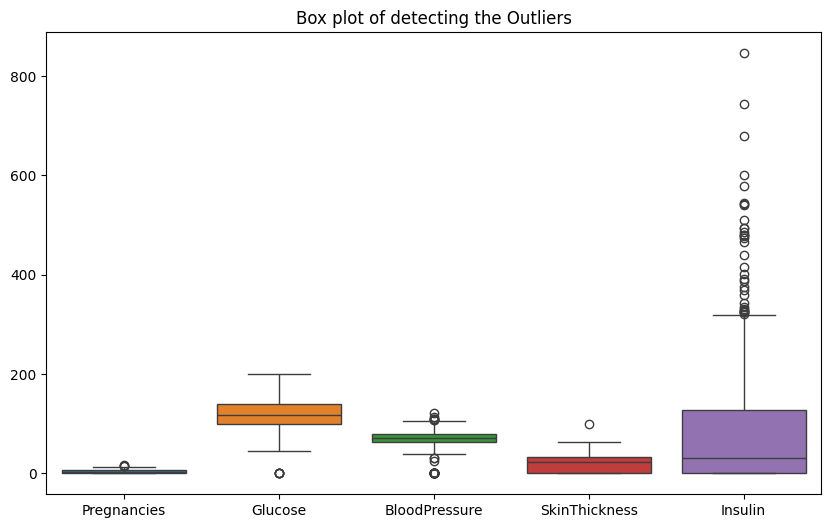

In [98]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data[outliers])
plt.title("Box plot of detecting the Outliers")
plt.show()

<Axes: >

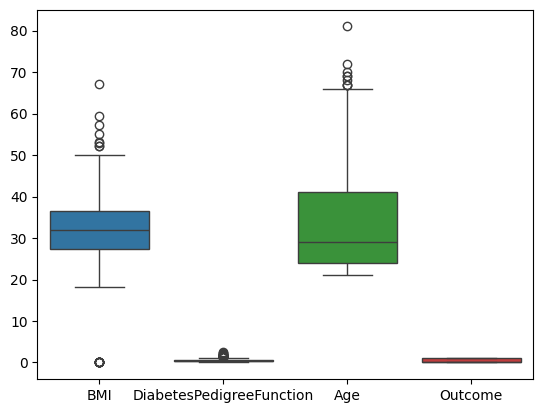

In [99]:
outliers1=['BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
sns.boxplot(data=data[outliers1])

### Removing the Outliers

In [100]:
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness',
        'Insulin','BMI','DiabetesPedigreeFunction','Age']

In [101]:
Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [102]:
data_clean = data[~((data[cols] < lower_bound) | (data[cols] > upper_bound)).any(axis=1)]

### Check shape before and after 

In [103]:
print("Original shape:", data.shape)
print("After removing outliers:", data_clean.shape)

Original shape: (768, 9)
After removing outliers: (639, 9)


## Verify again the outliers 

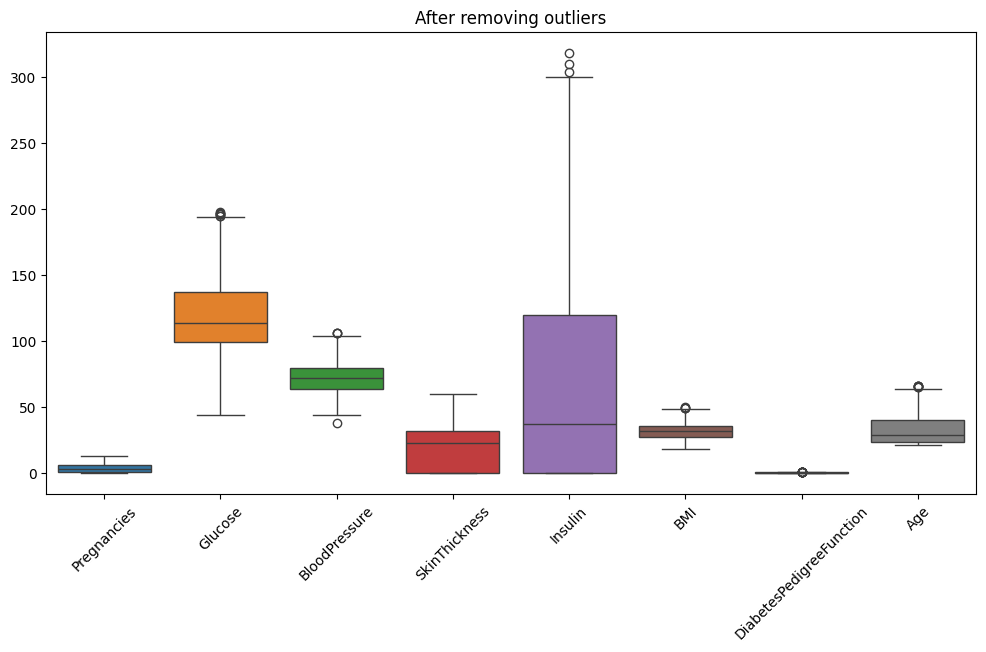

In [104]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data_clean[cols])
plt.title("After removing outliers")
plt.xticks(rotation=45)
plt.show()

### Convert the Features into dependent and independent

In [105]:
X=data.drop(["Outcome"],axis=1)
y=data["Outcome"]

In [106]:
X,y

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              6      148             72             35        0  33.6   
 1              1       85             66             29        0  26.6   
 2              8      183             64              0        0  23.3   
 3              1       89             66             23       94  28.1   
 4              0      137             40             35      168  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 763           10      101             76             48      180  32.9   
 764            2      122             70             27        0  36.8   
 765            5      121             72             23      112  26.2   
 766            1      126             60              0        0  30.1   
 767            1       93             70             31        0  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                       0.627   50  
 1                    

### Feature Engeering

In [107]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

## Feature Scalling

In [108]:
sc=StandardScaler()
sc

,copy,True
,with_mean,True
,with_std,True


In [109]:
x_train=sc.fit_transform(x_train)
x_test = sc.transform(x_test) 


In [110]:
x_test

array([[ 0.07102775, -0.77743141, -0.69590975, ..., -1.40894623,
        -0.40614581, -0.61803592],
       [ 1.58529992, -0.03793817,  0.14583088, ..., -1.40894623,
         0.76665344,  1.24628504],
       [ 0.07102775, -0.9314925 ,  0.0406133 , ...,  0.1386487 ,
        -0.08981828, -0.95700337],
       ...,
       [-0.23182668, -0.68499475, -0.80112733, ..., -0.80500675,
        -0.9612111 , -0.78751965],
       [ 0.07102775, -0.80824362,  0.0406133 , ...,  0.01282798,
         0.40556257, -0.78751965],
       [ 1.88815435,  0.23937179,  0.35626604, ...,  0.49094674,
        -0.58519913,  0.48360828]], shape=(154, 8))

In [111]:
x_train

array([[-5.34681116e-01, -1.17799024e+00, -1.69821857e-01, ...,
         2.54100490e-02,  6.23770442e-02, -9.57003370e-01],
       [-5.34681116e-01, -1.05474137e+00, -5.90692172e-01, ...,
         8.83204123e-02, -9.25400438e-01, -7.02777785e-01],
       [-8.37535550e-01, -3.73540435e+00, -6.46042788e-02, ...,
         2.45903700e-04, -2.59918932e-01, -9.57003370e-01],
       ...,
       [ 2.19100878e+00,  4.24245102e-01, -3.64200195e+00, ...,
         2.55440665e+00,  3.04099026e-01,  5.68350141e-01],
       [-2.31826683e-01, -3.15248134e-01, -5.90692172e-01, ...,
        -3.14305913e-01, -1.37565830e-01, -9.57003370e-01],
       [-2.31826683e-01,  2.39371793e-01,  1.19800667e+00, ...,
         5.53857101e-01,  1.46794561e+00, -1.09584753e-01]],
      shape=(614, 8))

### Train the Model 

In [112]:
model=Sequential()
model

<Sequential name=sequential_1, built=False>

###  Input layer + Hidden layer 1

In [113]:
model.add(Dense(16, activation='relu', input_dim=8))
model.add(Dropout(0.3))

c:\Users\nisha\Diabetes Prediction\tf_env\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Hidden layer 2

In [114]:
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))

### Hidden Layer 3

In [115]:
model.add(Dense(1, activation='relu'))

###
 Output layer

In [116]:
model.add(Dense(1, activation='sigmoid'))

### Compile the Model

In [117]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Train the Model

In [118]:
history = model.fit(x_train,y_train,epochs=150,batch_size=16,validation_data=(x_test, y_test))

Epoch 1/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6401 - loss: 0.6823 - val_accuracy: 0.6948 - val_loss: 0.6579
Epoch 2/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6401 - loss: 0.6553 - val_accuracy: 0.6948 - val_loss: 0.6158
Epoch 3/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6401 - loss: 0.6446 - val_accuracy: 0.6948 - val_loss: 0.5756
Epoch 4/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6401 - loss: 0.6186 - val_accuracy: 0.6948 - val_loss: 0.5482
Epoch 5/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6401 - loss: 0.6063 - val_accuracy: 0.6948 - val_loss: 0.5330
Epoch 6/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6401 - loss: 0.6078 - val_accuracy: 0.6948 - val_loss: 0.5205
Epoch 7/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6401 - loss: 0.5940 - val_accuracy: 0.6948 - val_loss: 0.5164
Epoch 8/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6401 - loss: 0.5779 - val_accuracy: 0.6948 - v

### Evaluate the Model

In [119]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Accuracy:", accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7987 - loss: 0.4440 
Accuracy: 0.798701286315918


### Make prediction

In [120]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
print(y_pred[:10])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
[[False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]]


In [121]:
model.save("../Model/diabetes_model.h5")

In [ ]:
joblib.dump(sc, "../Model/scaler.pkl")


['../Model/scaler.pkl']